In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
newDateQuery = engine.execute('SELECT date FROM measurement ORDER BY date DESC LIMIT 1').fetchall()
newDate = dt.datetime.strptime(newDateQuery[0][0],"%Y-%m-%d")
print(newDate)

2017-08-23 00:00:00


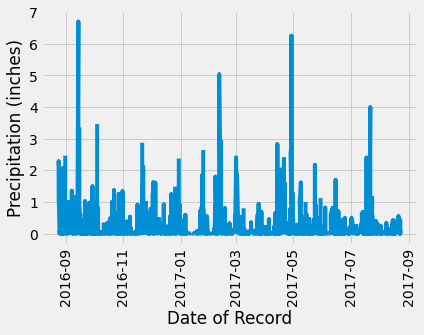

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#Student (Jordan's) NOTE: newDate was found in previous cell

# Calculate the date one year from the last date in data set.
oldDate = newDate - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
yearQuery = engine.execute(f"SELECT date,prcp FROM measurement WHERE date > '{oldDate}'")

# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.DataFrame(yearQuery,columns=yearQuery.keys())
measurement_df.index = measurement_df['date']

# Sort the dataframe by date
measurement_df.sort_index(ascending=True,inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
xdata=pd.to_datetime(measurement_df['date'])
ydata=measurement_df['prcp']

plt.xlabel('Date of Record')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=90)
plt.plot(xdata,ydata)
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_sum_df = measurement_df.describe()
precip_sum_df['prcp']

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stationQuery = engine.execute('SELECT COUNT(DISTINCT station) FROM measurement').fetchall()
stationCount = stationQuery[0][0]

stationCount

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activityQuery = engine.execute("SELECT station AS 'Station_id', count(*) AS 'Count' FROM measurement GROUP BY station ORDER BY Count desc").fetchall()
activityQuery

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#extract the active station from the list, since it's already ordered we can grab the first object
activeStation = activityQuery[0][0]

#run the query
activeQuery = engine.execute(f"SELECT station AS 'Station_id', MIN(tobs) AS 'Minimum_Temp', MAX(tobs) AS 'Maximum_Temp', AVG(tobs) AS 'Average_Temp' FROM measurement WHERE station = '{activeStation}'")

#display the results
activeQuery.mappings().all()

[{'Station_id': 'USC00519281', 'Minimum_Temp': 54.0, 'Maximum_Temp': 85.0, 'Average_Temp': 71.66378066378067}]

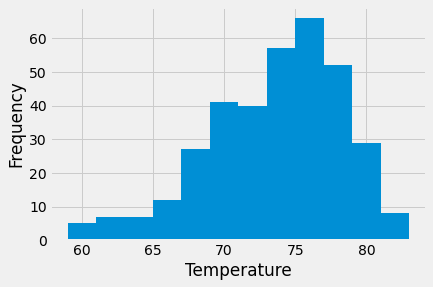

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Query of Data
activeYearQuery = engine.execute(f"SELECT date,tobs FROM measurement WHERE  date > '{oldDate}' AND station = '{activeStation}'")

#Posting Active station data into dataframe
activeStation_df = pd.DataFrame(activeYearQuery, columns = activeYearQuery.keys())

#Building the histogram from dataframe
xdata = activeStation_df['tobs']
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.hist(xdata,bins=12)
plt.show()

# Close session

In [16]:
# Close Session
session.close()